# 0. Configurações



In [74]:
   !pip install category_encoders

### Bibliotecas

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from category_encoders import OneHotEncoder

from scipy.stats import skew, pearsonr, spearmanr

from xgboost import XGBRegressor
from IPython.display import display
import time
import os

from google.colab import drive, userdata

### Diretórios

In [76]:
drive.mount ( '/content/drive/' )
DATA_DIR= '/content/drive/MyDrive/Colab Notebooks/Datasets/HousingPrices/Data/'
#DATA_DIR = '/content/sample_data/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [77]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

# 1. Data

## 1.1 Load Data


In [78]:
train_df = pd.read_csv(DATA_DIR+'train.csv')

### 1.1.2 Descrição das Features

**Features Categóricas**

 Lote e terreno:<br>
MSZoning: zona de uso do solo (residencial baixo, médio, comercial…). Impacta valor por restrição de construção.

Street: tipo de rua (pavimentada ou de terra).

LotShape: formato do terreno (regular ou irregular).

LandContour: nível do terreno em relação à rua (plano, depressão, encosta…).

Utilities: disponibilidade de serviços públicos (água, eletricidade, gás, esgoto).

LotConfig: configuração do lote (esquina, interno, cul-de-sac…).

LandSlope: inclinação do terreno.

Construção e estrutura:<br>
Condition1: condição geral da casa, fatorada pela proximidade de vias ou instalações importantes.

Condition2: mesma ideia que Condition1, caso haja duas condições relevantes.

BldgType: tipo de edificação (casa isolada, geminada, duplex…).

HouseStyle: estilo da casa (número de andares e tipo).

RoofStyle: estilo do telhado.

RoofMatl: material do telhado.

Qualidade e acabamento externo:<br>
Exterior1st: material de acabamento exterior principal.

Exterior2nd: material de acabamento exterior secundário.

ExterQual: qualidade geral do material externo (qualitativo: Ex, Gd, TA…).

ExterCond: condição geral do material externo.

Estrutura e porão:<br>
Foundation: tipo de fundação.

BsmtQual: altura e qualidade do porão.

BsmtCond: condição geral do porão.

BsmtExposure: exposição do porão (janela, saída externa…).

BsmtFinType1: tipo de acabamento principal no porão.

BsmtFinType2: tipo de acabamento secundário no porão.

Aquecimento:<br>
Heating: tipo de sistema de aquecimento.

HeatingQC: qualidade e condição do aquecimento.

Instalações e utilidades:
CentralAir: se a casa tem ar-condicionado central (Y/N).

Electrical: tipo de sistema elétrico.

Cozinha:
KitchenQual: qualidade da cozinha.

Outras características internas:
Functional: funcionalidade geral da casa (se algum cômodo é inutilizável, por exemplo).

GarageType: tipo de garagem (anexa, destacada, subterrânea…).

GarageFinish: acabamento interno da garagem.

GarageQual: qualidade da garagem.

GarageCond: condição da garagem.

PavedDrive: se a entrada da garagem é pavimentada.
 Venda:
SaleType: tipo de venda (normal, financiada, leilão…).

SaleCondition: condição de venda (normal, herança, execução hipotecária…).

Localização:
Neighborhood: bairro onde a casa está localizada (um dos fatores mais importantes para o preço).



## 1.2 EDA

In [79]:
train_df.shape

(1460, 81)

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Observar media, mediana, desvio padrão, min e max em cada feature. Procurar por outliers.

In [82]:
train_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###Observações importantes:

* Média do preço das casas no dataset: $180921
* Desvio Padrão de SalePrice está alto, provavelmente indicativo de outlier. Verificação será feita na parte de visualização
* Dados em escalas diferentes podem afetar alguns modelos (como redes neurais). Talvez seja interessante normalizar os dados dependendo do modelo a ser utilizado.



### Verificar dados faltantes

In [83]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]


,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Verificar dados duplicados

In [84]:
train_df.duplicated().sum()

np.int64(0)

In [85]:
#Apenas uma cópia para a remoção dos dados faltantes diretas em train_df
original_train_df = train_df.copy()


Algumas features estão com muitos valores ausentes. Em primeiro momento vamos estar retirando elas do nosso dataset, para não ter perigo do modelo aprender falsos padrões

In [86]:
cols_with_missing = [col for col in train_df.columns
                     if train_df[col].isnull().sum() > 600 and col != 'SalePrice']
train_df = train_df.drop(cols_with_missing, axis=1)


###Divisão de features categóricas e numéricas

#### Separação de colunas numéricas e categóricas

In [87]:
cols_num =[col for col in train_df.columns if train_df[col].dtype in ['int64', 'float64']]
cols_cat = [col for col in train_df.columns if train_df[col].dtype == 'object']

Verificar ao usar one_hot se não existe nenhuma relação de sequência.

In [88]:
for col in cols_cat:
    n_unique = train_df[col].nunique()
    print(f"{col}: {n_unique} categorias")

MSZoning: 5 categorias
Street: 2 categorias
LotShape: 4 categorias
LandContour: 4 categorias
Utilities: 2 categorias
LotConfig: 5 categorias
LandSlope: 3 categorias
Neighborhood: 25 categorias
Condition1: 9 categorias
Condition2: 8 categorias
BldgType: 5 categorias
HouseStyle: 8 categorias
RoofStyle: 6 categorias
RoofMatl: 8 categorias
Exterior1st: 15 categorias
Exterior2nd: 16 categorias
ExterQual: 4 categorias
ExterCond: 5 categorias
Foundation: 6 categorias
BsmtQual: 4 categorias
BsmtCond: 4 categorias
BsmtExposure: 4 categorias
BsmtFinType1: 6 categorias
BsmtFinType2: 6 categorias
Heating: 6 categorias
HeatingQC: 5 categorias
CentralAir: 2 categorias
Electrical: 5 categorias
KitchenQual: 4 categorias
Functional: 7 categorias
GarageType: 6 categorias
GarageFinish: 3 categorias
GarageQual: 5 categorias
GarageCond: 5 categorias
PavedDrive: 3 categorias
SaleType: 9 categorias
SaleCondition: 6 categorias


Usar one hot em Neghborhood, Exterior1s e Exterior2nd , pode ser um problema dado o número alto de valores unicos de cada feature.
Separar em:
* onehot_cat - Features com valores únicos <=10
* ordianl_cat - Features com valores únicos > 10

Para valores numéricos vamos usar a mediana, que é mais robusta que a media em presença de outliers(serão identificados na visualização grafica)

In [89]:
onehot_cat = [col for col in cols_cat if train_df[col].nunique() <=10]
ordinal_cat = [col for col in cols_cat if train_df[col].nunique() >10]


In [90]:
train_df[onehot_cat + ordinal_cat].columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'Neighborhood',
       'Exterior1st', 'Exterior2nd'],
      dtype='object')

## 1.3 Visualização dos Dados

### Hipóteses Iniciais Para Guiar a Análise

* O preço de venda das casas varia de acordo com o ano em que a transação foi realizada?
* O ano de construção e o ano da última reforma de uma casa impactam significativamente o seu preço de venda?
* A quantidade de cômodos e a área total construída da casa estão positivamente correlacionadas com o preço de venda?
* Até que ponto a área construída da casa influencia o preço de venda?
* A localização da casa em determinadas vizinhanças afeta significativamente o preço de venda? Quais vizinhanças concentram os imóveis mais valorizados?







### Correlação

Variáveis Numéricas

Primeira passo da visualização será verificar as correlações com o heatmap

In [91]:
## Nas próximas linhas vou estar tentando visualizar correlações das variáveis numericas com a variável alvo 'SalePrice', primeiramente vou retirar as features com dados faltantes
features = [col for col in train_df.select_dtypes(include='number').columns
            if col != 'SalePrice' and not train_df[col].isnull().any()]
features_target = features + ['SalePrice']
cor_df = train_df[features_target].corr()

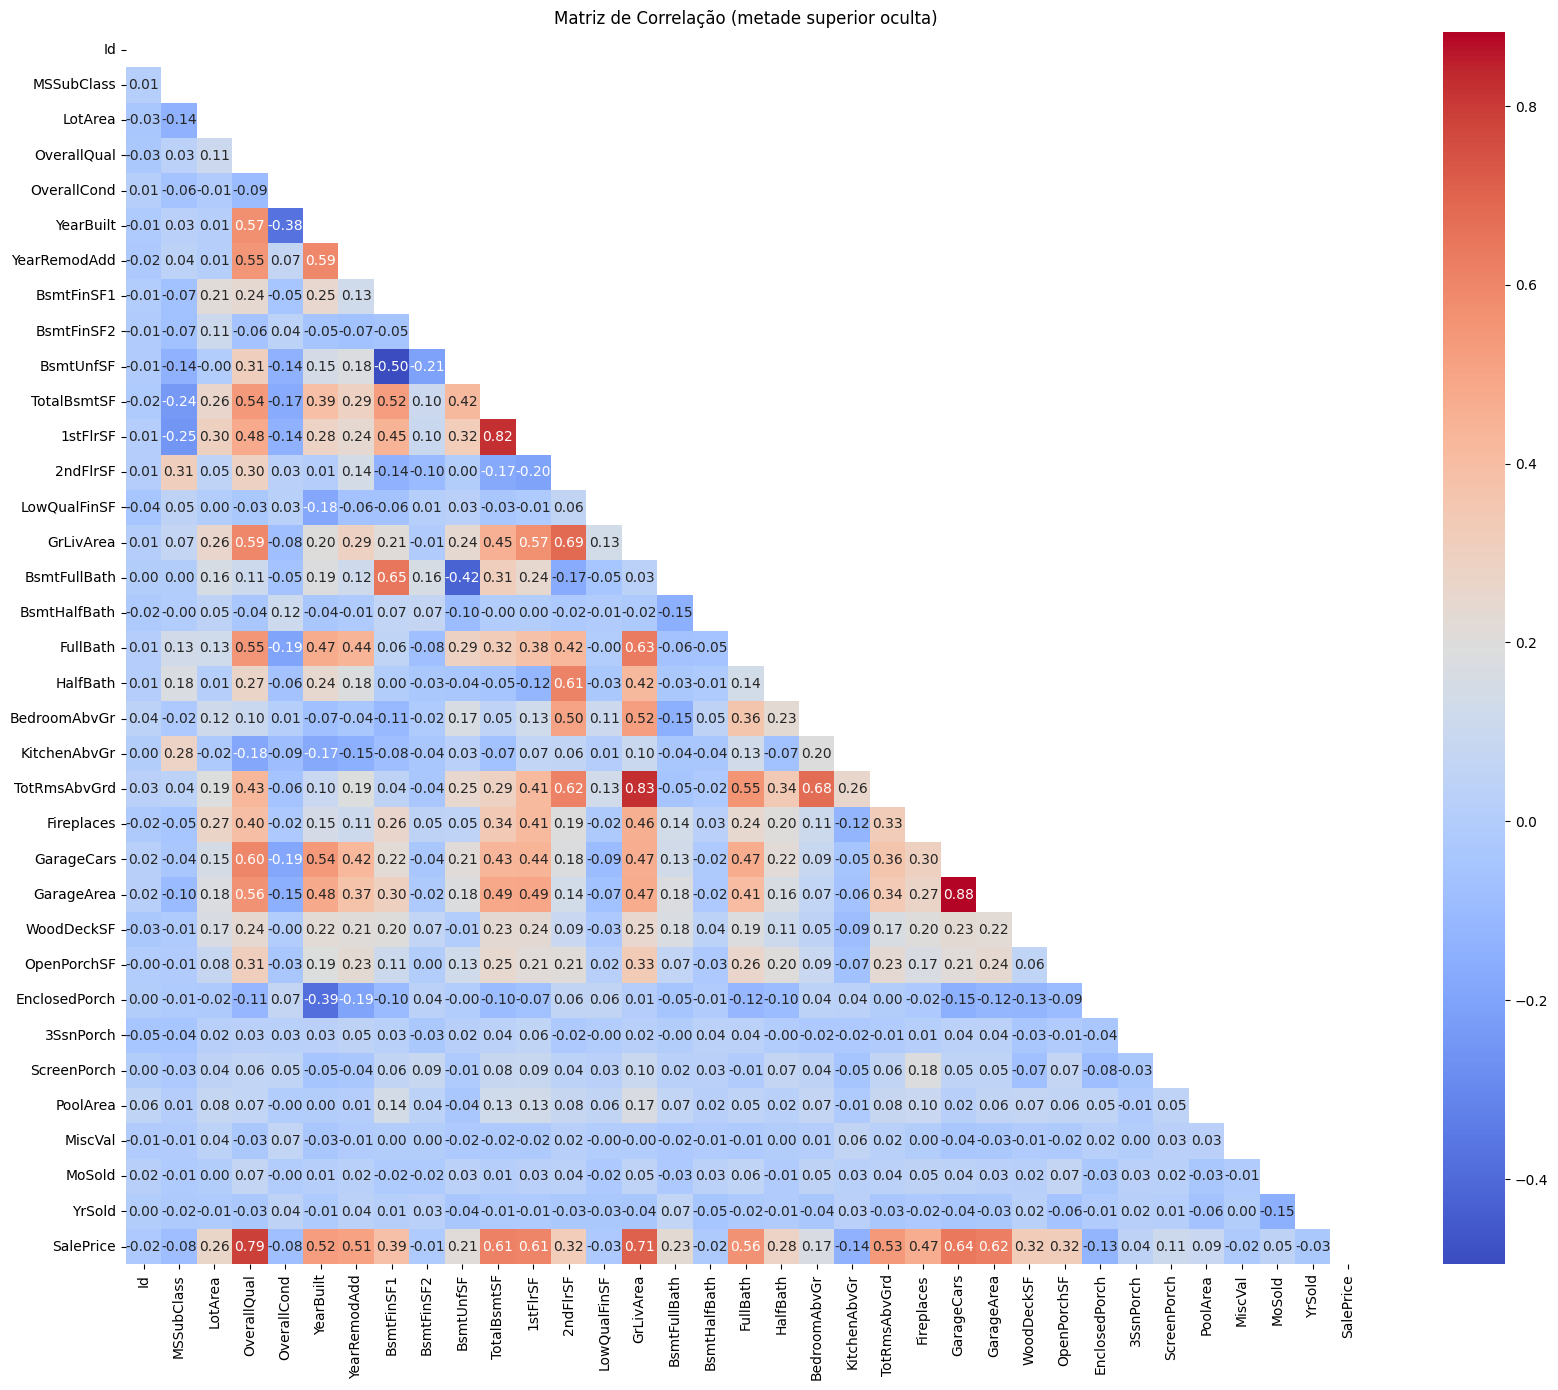

In [92]:
mask = np.triu(np.ones_like(cor_df, dtype=bool))

plt.figure(figsize=(20, 16))
sns.heatmap(cor_df, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação (metade superior oculta)")
plt.show()

Correlações altas: GrLivArea, OverallQual, FullBath, TotRmsAbvGrd, 1stSrfl<br>


### SalePrice

Skewness : 1.880940746034036


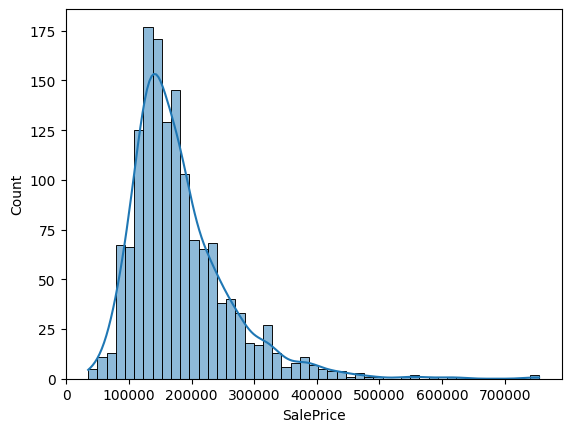

In [93]:
sns.histplot(data=train_df, x='SalePrice', kde = True)
print("Skewness :", skew(train_df['SalePrice']))



A distribuição do preço das casas apresenta assimetria à direita, com a maioria dos imóveis concentrando-se em torno de $150.000. No entanto, conforme indicado pela função describe(), há valores significativamente mais altos que podem representar outliers no extremo superior da distribuição. Ainda é necessário avaliar se esses valores são de fato relevantes, o que pode ser feito analisando outras variáveis com alta correlação com o preço dos imóveis.

Bloxpot de SalePrice

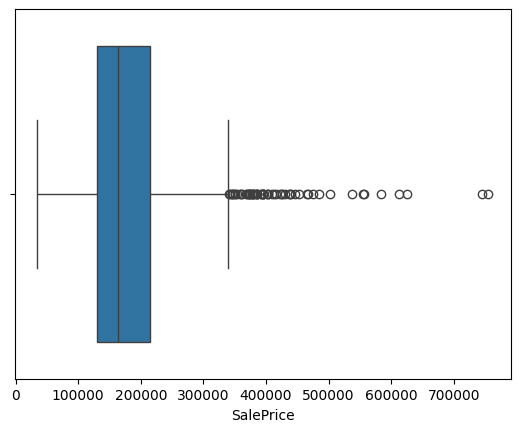

In [94]:
sns.boxplot(x=train_df['SalePrice'])
plt.show()

Outliers acima de aproximadamente $350000. Vamos descobrir de forma mais direta quem são os outliers


In [95]:
Q1 = train_df['SalePrice'].quantile(0.25)
Q3 = train_df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
outliers = train_df[train_df['SalePrice'] > limite_superior]

In [96]:
outliers[['SalePrice', 'GrLivArea', 'OverallQual', 'Neighborhood', 'GarageCars']]

,SalePrice,GrLivArea,OverallQual,Neighborhood,GarageCars
11,345000,2324,9,NridgHt,3
53,385000,1842,9,Veenker,3
58,438780,2945,10,StoneBr,3
112,383970,2696,7,CollgCr,3
151,372402,1710,8,NridgHt,3
...,...,...,...,...,...
1268,381000,3447,8,Crawfor,3
1353,410000,3238,8,NoRidge,3
1373,466500,2633,10,NoRidge,3
1388,377500,1746,9,Gilbert,3


Aparentemente os preços são justificáveis. Vamos usar o scatterplot para ver a distribuição de forma mais profunda.


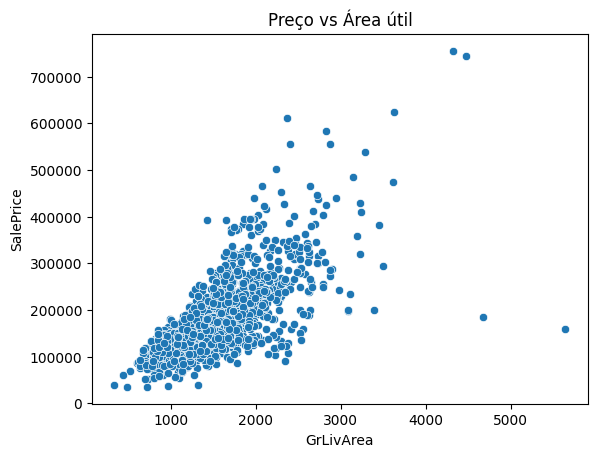

In [97]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('Preço vs Área útil')
plt.show()

Há duas casas com preços que parecem não condizer com o padrão

In [98]:
outliers_grlivarea = train_df[train_df['GrLivArea'] > 4000][['SalePrice', 'GrLivArea', 'OverallQual', 'Neighborhood']]
print(outliers_grlivarea)

      SalePrice  GrLivArea  OverallQual Neighborhood
523      184750       4676           10      Edwards
691      755000       4316           10      NoRidge
1182     745000       4476           10      NoRidge
1298     160000       5642           10      Edwards


Remoção dos outliers

In [99]:
outliers_delete = [523, 1298]
train_df = train_df.drop(outliers_delete)



In [100]:
outliers_grlivarea = train_df[train_df['GrLivArea'] > 4000][['SalePrice', 'GrLivArea', 'OverallQual', 'Neighborhood']]
print(outliers_grlivarea)

      SalePrice  GrLivArea  OverallQual Neighborhood
691      755000       4316           10      NoRidge
1182     745000       4476           10      NoRidge


### Variáveis relacionadas com o  tempo

#### YearSold

In [101]:
train_df['YrSold'].value_counts() # Ano de Transação 2006-2010

,count
YrSold,
2009,338
2007,328
2006,314
2008,303
2010,175


<Axes: xlabel='YrSold', ylabel='SalePrice'>

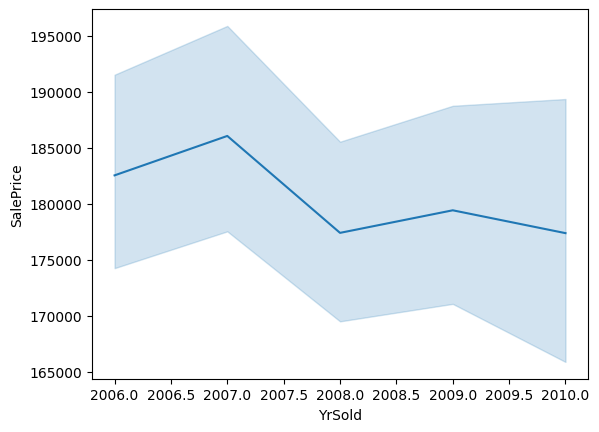

In [102]:
sns.lineplot(data=train_df, x='YrSold', y='SalePrice')


É possível observar um declínio acentuado entre os anos de 2007 a 2008 no preço das casas nesse dataset.
Formulação de Hipótese:
 O decaimento possívelmente está ligado a Crise imobiliária dos EUA. O quanto afetou os próximos anos?

Vamos assumir a ligação dos preços com a crise, e tentar ver o quanto afetou o preço das casas antes e depois da crise imobiliária.

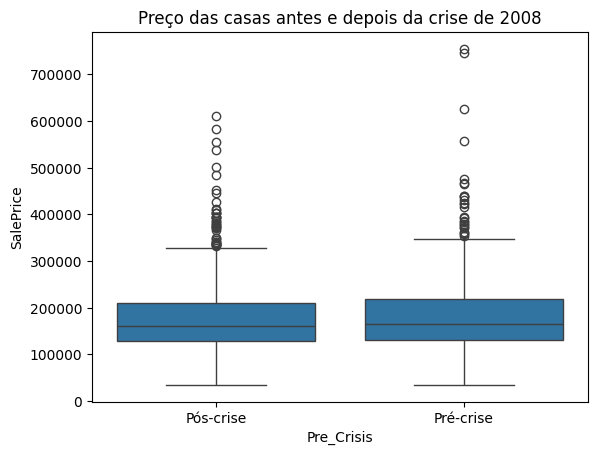

In [103]:
train_df_copy = train_df.copy()
train_df_copy['Pre_Crisis'] = (train_df_copy['YrSold'] < 2008).astype(int)
sns.boxplot(x='Pre_Crisis', y='SalePrice', data=train_df_copy)
plt.xticks([0, 1], ['Pós-crise', 'Pré-crise'])
plt.title('Preço das casas antes e depois da crise de 2008')
plt.show()

Há uma leve redução do preço das casas após a crise. Mas, o intervalo interqualítico é bem parecido em ambos os casos.



Qual foi o ano que teve o maior número de casas vendidas:

YrSold
2006    314
2007    328
2008    303
2009    338
2010    175
Name: count, dtype: int64


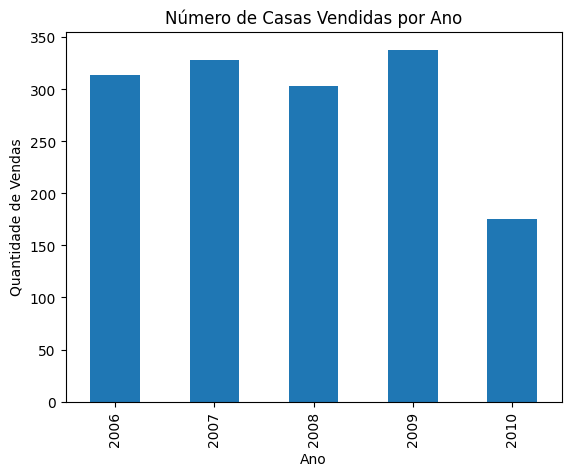

In [104]:
sales_per_year = train_df['YrSold'].value_counts().sort_index()

# Exibir os resultados
print(sales_per_year)

# Visualizar em gráfico de barras
import matplotlib.pyplot as plt

sales_per_year.plot(kind='bar')
plt.title("Número de Casas Vendidas por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Vendas")
plt.show()

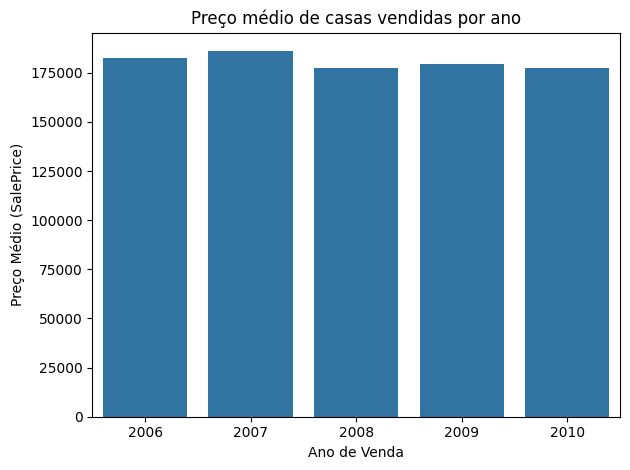

In [105]:
sns.barplot(
    data=train_df,
    x='YrSold',
    y='SalePrice',
    estimator='mean',
    errorbar=None
)

plt.title("Preço médio de casas vendidas por ano")
plt.xlabel("Ano de Venda")
plt.ylabel("Preço Médio (SalePrice)")
plt.tight_layout()
plt.show()

#### YearBuilt
Verificar se o ano de construção influencia no preço da casa

<Axes: xlabel='YearBuilt', ylabel='Count'>

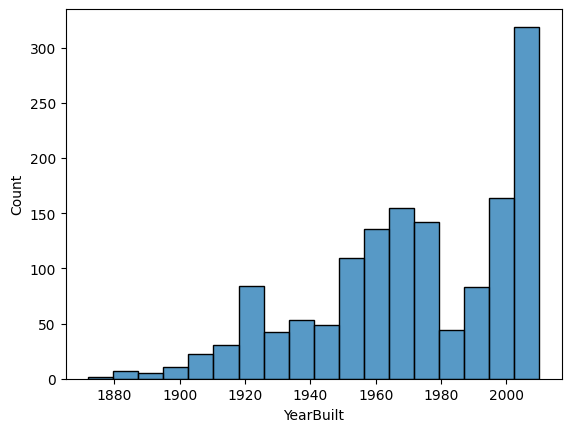

In [106]:
sns.histplot(data=train_df, x='YearBuilt', kde=False)


A maioria das casas do dataset foram construídas acima do ano 1960

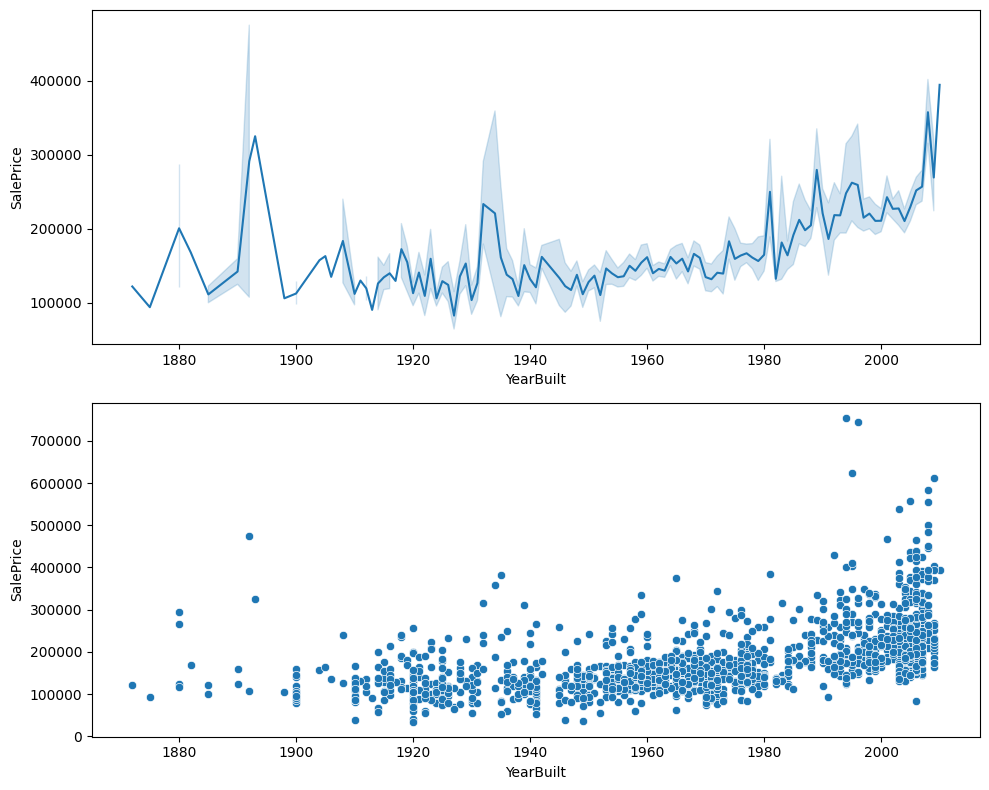

In [107]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.lineplot(data=train_df, x='YearBuilt', y='SalePrice', ax=axes[0])
sns.scatterplot(data=train_df, x='YearBuilt', y='SalePrice', ax=axes[1])

plt.tight_layout()
plt.show()


Casas próximos de 1890 possuem um preço mais elevado(possívelmente um outlier), fora isso o normal é casas mais novas custarem mais.

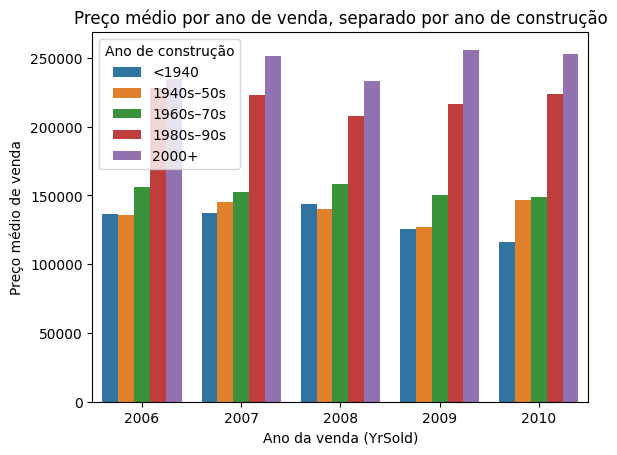

In [108]:
train_df['YearBuiltGroup'] = pd.cut(
    train_df['YearBuilt'],
    bins=[1870, 1940, 1960, 1980, 2000, 2020],
    labels=['<1940', '1940s–50s', '1960s–70s', '1980s–90s', '2000+']
)
sns.barplot(
    data=train_df,
    x='YrSold',
    y='SalePrice',
    hue='YearBuiltGroup',
    errorbar = None
)

plt.title("Preço médio por ano de venda, separado por ano de construção")
plt.ylabel("Preço médio de venda")
plt.xlabel("Ano da venda (YrSold)")
plt.legend(title="Ano de construção")
plt.show()

Aqui estamos verificando se dependendo do ano de construção da casa, o preço do imóvel vai ser afetado após a crise de 2008

#### YearRemodAdd(Ano de Reforma)

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

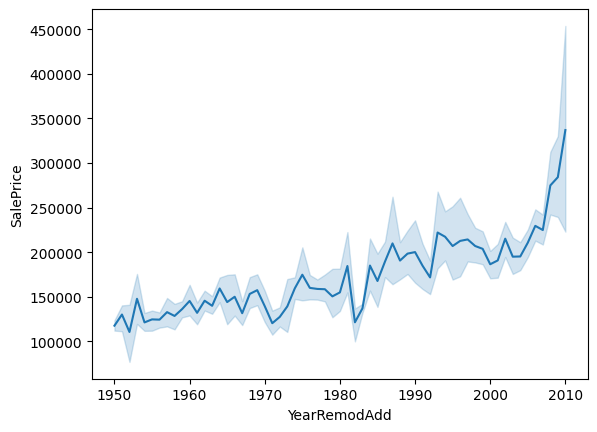

In [109]:
sns.lineplot(data=train_df, x='YearRemodAdd', y='SalePrice')

Casa com reformas "atuais" possuem a tendência de valores mais elevados nesse dataset

### Variáveis físicas

Área da Casa(GrLivArea)

<Axes: xlabel='GrLivArea', ylabel='Count'>

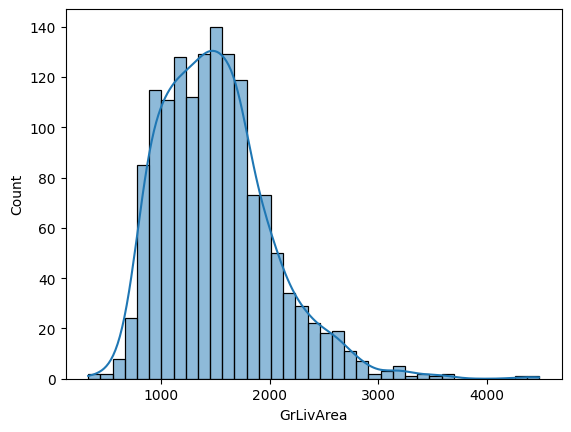

In [110]:
sns.histplot(x = train_df['GrLivArea'], kde=True)


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

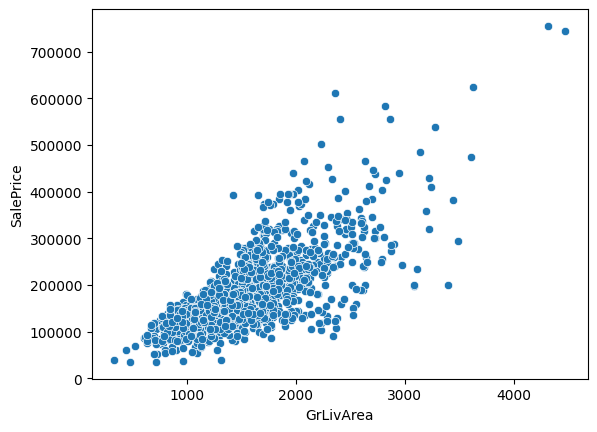

In [111]:
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice')


Área da Casa(GrLivArea) correlacionada com o preço(SalePrice)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

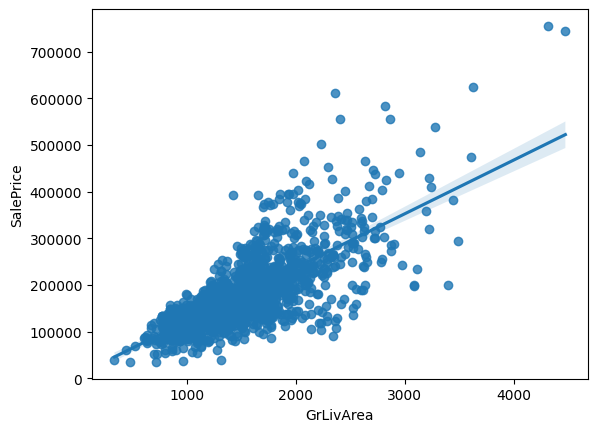

In [112]:
sns.regplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])


In [113]:

pearson_corr, _ = pearsonr(train_df['GrLivArea'], train_df['SalePrice'])
print("Correlação de Pearson:", pearson_corr)

spearman_corr, _ = spearmanr(train_df['GrLivArea'], train_df['SalePrice'])
print("Correlação de Spearman:", spearman_corr)

Correlação de Pearson: 0.7349681645359327
Correlação de Spearman: 0.732342390416779


Tamanho do Lote(LotArea)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

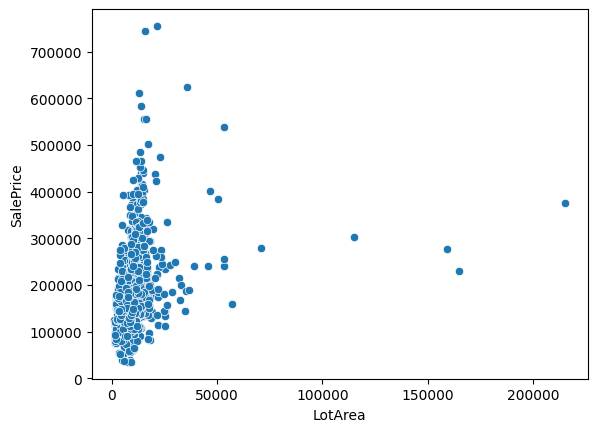

In [114]:
sns.scatterplot(data=train_df, x='LotArea', y='SalePrice')

É possível observar que, embora algumas casas tenham um terreno (LotArea) muito grande, elas apresentam uma qualidade geral (OverallQual) apenas razoável. Isso pode contribuir para que o preço final seja relativamente menor, já que OverallQual é uma variável fortemente correlacionada com o valor de venda.

In [115]:
outliers_LotArea = train_df[train_df['LotArea'] > 55000][['SalePrice', 'GrLivArea', 'OverallQual', 'Neighborhood', 'GarageCars', 'LotArea']]

print(outliers_LotArea)

      SalePrice  GrLivArea  OverallQual Neighborhood  GarageCars  LotArea
249      277000       2144            6      ClearCr           2   159000
313      375000       2036            7       Timber           2   215245
335      228950       1786            5       Timber           2   164660
451      280000       1533            7      ClearCr           2    70761
706      302000       1824            7      ClearCr           2   115149
1396     160000       1687            5       Timber           2    57200


### Análise de variáveis categóricas

#### Neighborhood

O bairro influencia no preço da casa?
Variação da media em todos os bairros com o passar dos anos.

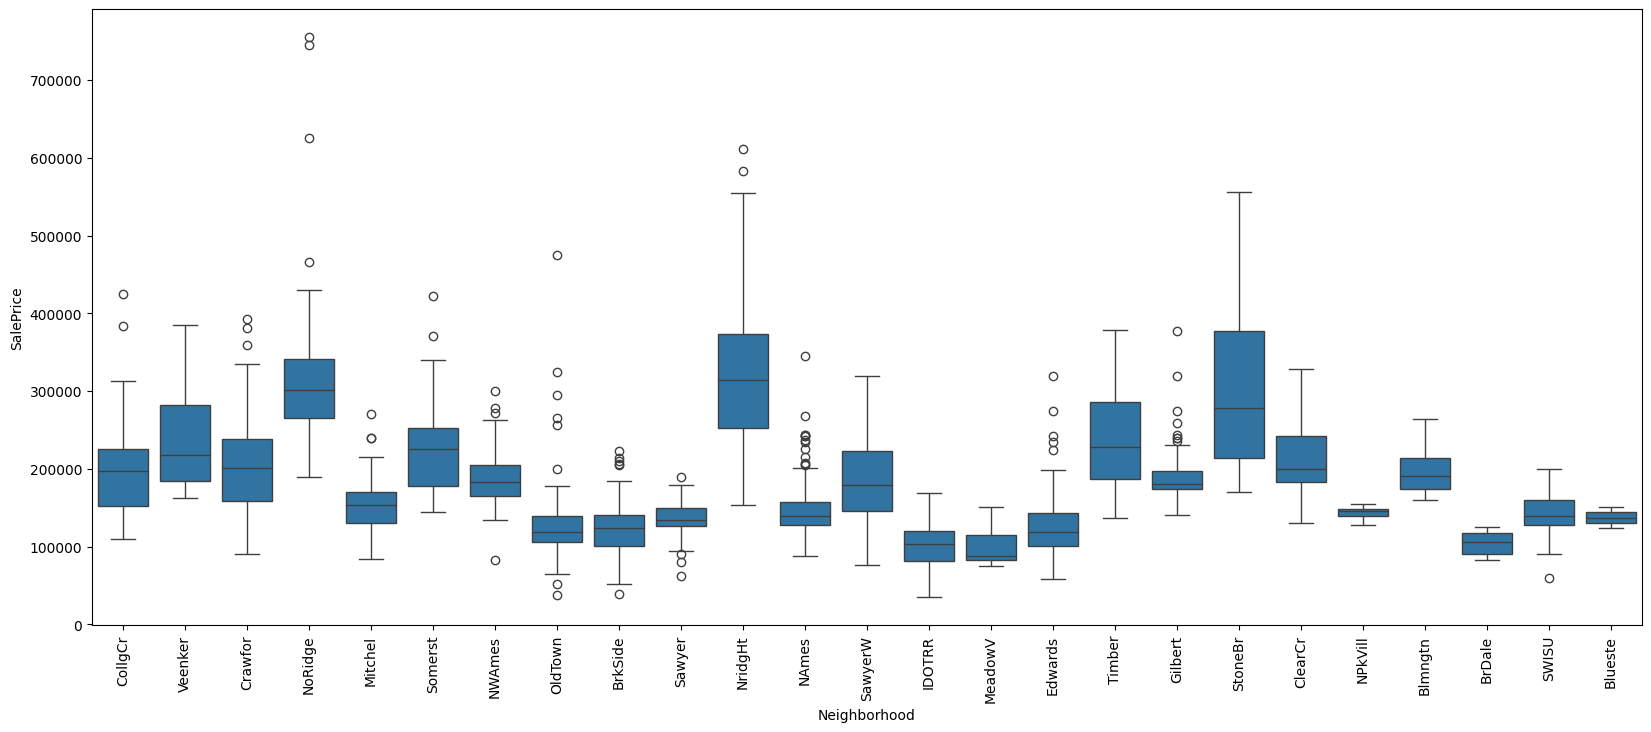

In [116]:
plt.figure(figsize=(20, 8))
sns.boxplot(x=train_df['Neighborhood'], y=train_df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

As casas localizadas nos bairros Stone Brook e Northridge Heights apresentam, em geral, preços significativamente mais elevados. Por outro lado, bairros como IDOTRR, MeadowV e BrDale concentram imóveis com preços consideravelmente abaixo da média observada nos demais bairros.

Frequência dos bairros

In [117]:
train_df['Neighborhood'].value_counts(normalize = True) * 100

,proportion
Neighborhood,
NAmes,15.432099
CollgCr,10.288066
OldTown,7.750343
Edwards,6.721536
Somerst,5.898491
Gilbert,5.418381
NridgHt,5.281207
Sawyer,5.075446
NWAmes,5.006859


ViolinPlot com bairros mais frequentes

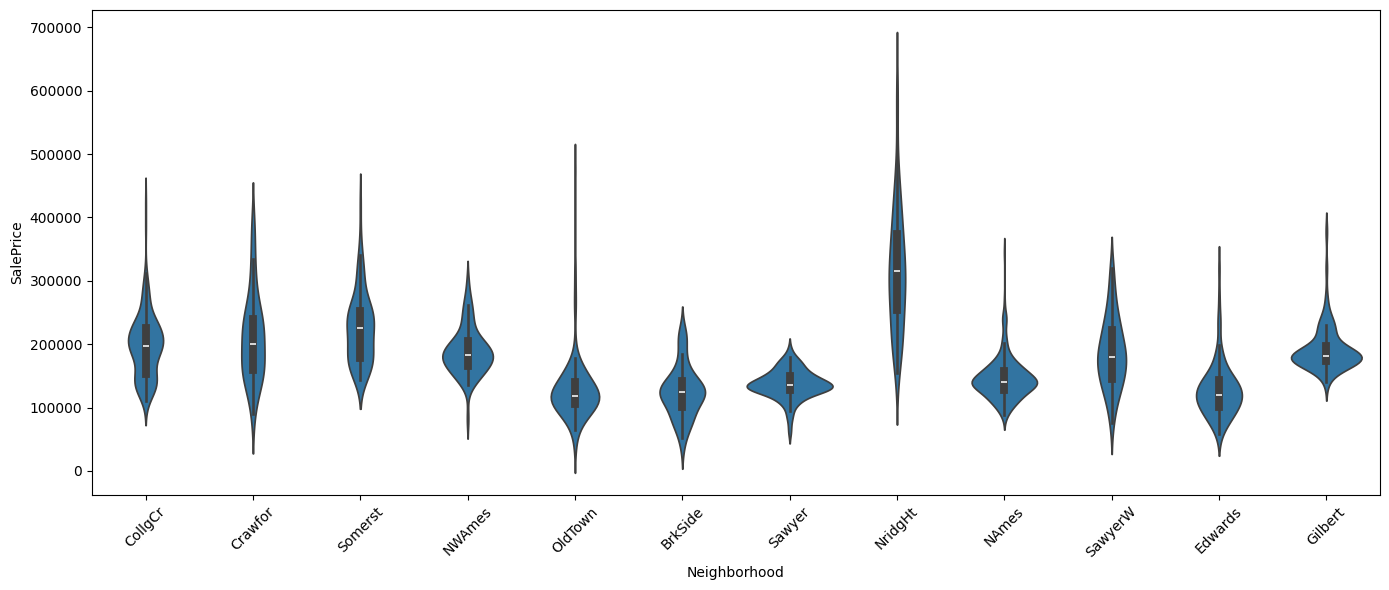

In [118]:
bairro_freq = train_df['Neighborhood'].value_counts()
bairros_mais_comuns = bairro_freq[bairro_freq > 50].index

plt.figure(figsize=(14, 6))
sns.violinplot(data=train_df[train_df['Neighborhood'].isin(bairros_mais_comuns)],
               x='Neighborhood', y='SalePrice')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### HouseStyle

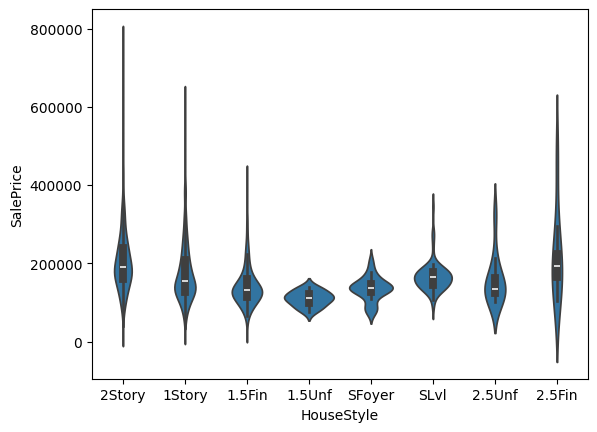

In [119]:
sns.violinplot(data=train_df, x='HouseStyle', y='SalePrice')
plt.show()

Observa-se que casas com estilo 2Story e 2.5Fin possuem, em média, preços mais elevados, refletindo uma possível valorização de imóveis com mais andares ou com acabamento completo nos níveis superiores. Por outro lado, estilos como 1.5Unf e SFoyer apresentam medianas mais baixas, o que pode indicar construções mais simples ou com menos apelo de mercado

# 2.  Separação das Variáveis e Definição dos Transformadores

## 2.1 Separação da variável alvo e variáveis preditoras

In [120]:
y = train_df['SalePrice']
X = train_df.drop('SalePrice', axis=1)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##2.1.2 Transformadores

In [122]:
cols_num =[col for col in X.columns if X[col].dtype in ['int64', 'float64']]


In [123]:
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [124]:
numeric_imputer = SimpleImputer(strategy= 'median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, cols_num),
        ('onehot_cat', onehot_transformer, onehot_cat),
        ('ordinal_cat', ordinal_transformer, ordinal_cat)
    ])


# 3 Modelos e Comparação

##Ajuste de Parâmetros e Predição


### DecisionTree

In [125]:
pipeline_dt = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=0))
])

In [126]:
param_grid_dt = {
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5]
}

grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='neg_mean_absolute_error')
grid_dt.fit(X_train, y_train)
print("Decision Tree - Melhores parâmetros:", grid_dt.best_params_)


Decision Tree - Melhores parâmetros: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10}


In [127]:
DecisionTreeRegressor_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(
        max_depth=grid_dt.best_params_['model__max_depth'],
        min_samples_split=grid_dt.best_params_['model__min_samples_split'],
        min_samples_leaf=grid_dt.best_params_['model__min_samples_leaf'],
        random_state=0
    ))
])
DecisionTreeRegressor_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'Ful...
                                                   'GarageFinish', 'GarageQual', ...]),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Neighborhood',
                                                   'Exterior1st',
                                                   'Exterior2nd'])])),
                ('model',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=10, random_state=0))])

In [128]:
predictions_DecisionTree = DecisionTreeRegressor_pipeline.predict(X)
mae = mean_absolute_error(y, predictions_DecisionTree)
print(" MAE:", mae)


 MAE: 13583.927205046022


### RandomForest

In [129]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=0, n_jobs=-1))
])


In [130]:
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_rf.fit(X_train, y_train)
print("Random Forest - Melhores parâmetros:", grid_rf.best_params_)


Random Forest - Melhores parâmetros: {'model__max_depth': None, 'model__n_estimators': 300}


In [131]:
RandomForest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=grid_rf.best_params_['model__n_estimators'],
        max_depth=grid_rf.best_params_['model__max_depth'],
        random_state=0,
        n_jobs=-1
    ))
])
RandomForest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'Ful...
                                                   'Functional', 'GarageType',
                                                   'GarageFinish', 'GarageQual', ...]),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Neighborhood',
                                                   'Exterior1st',
                                                   'Exterior2nd'])])),
                ('model',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=0))])

### XGBoost

In [132]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=0, n_jobs=-1))
])
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_absolute_error')
grid_xgb.fit(X_train, y_train)
print("XGBoost - Melhores parâmetros:", grid_xgb.best_params_)

XGBoost - Melhores parâmetros: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}


In [133]:
XGB_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=grid_xgb.best_params_['model__n_estimators'],
        max_depth=grid_xgb.best_params_['model__max_depth'],
        learning_rate=grid_xgb.best_params_['model__learning_rate'],
        n_jobs=-1,
        random_state=0
    ))
])
XGB_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'Ful...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=-1,
                              num_parallel_tree=None, ...))])

## Comparação dos Resultados

In [134]:
def calcular_metricas(nome, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return {
        'Modelo': nome,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R²': round(r2, 4)
    }

In [135]:
resultados = []
resultados.append(calcular_metricas('Decision Tree', DecisionTreeRegressor_pipeline, X_test, y_test))
resultados.append(calcular_metricas('Random Forest', RandomForest_pipeline, X_test, y_test))
resultados.append(calcular_metricas('XGBoost', XGB_pipeline, X_test, y_test))
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

          Modelo       MAE      RMSE      R²
0  Decision Tree  25362.69  36424.57  0.7598
1  Random Forest  16709.46  24244.99  0.8936
2        XGBoost  14584.63  20754.68  0.9220


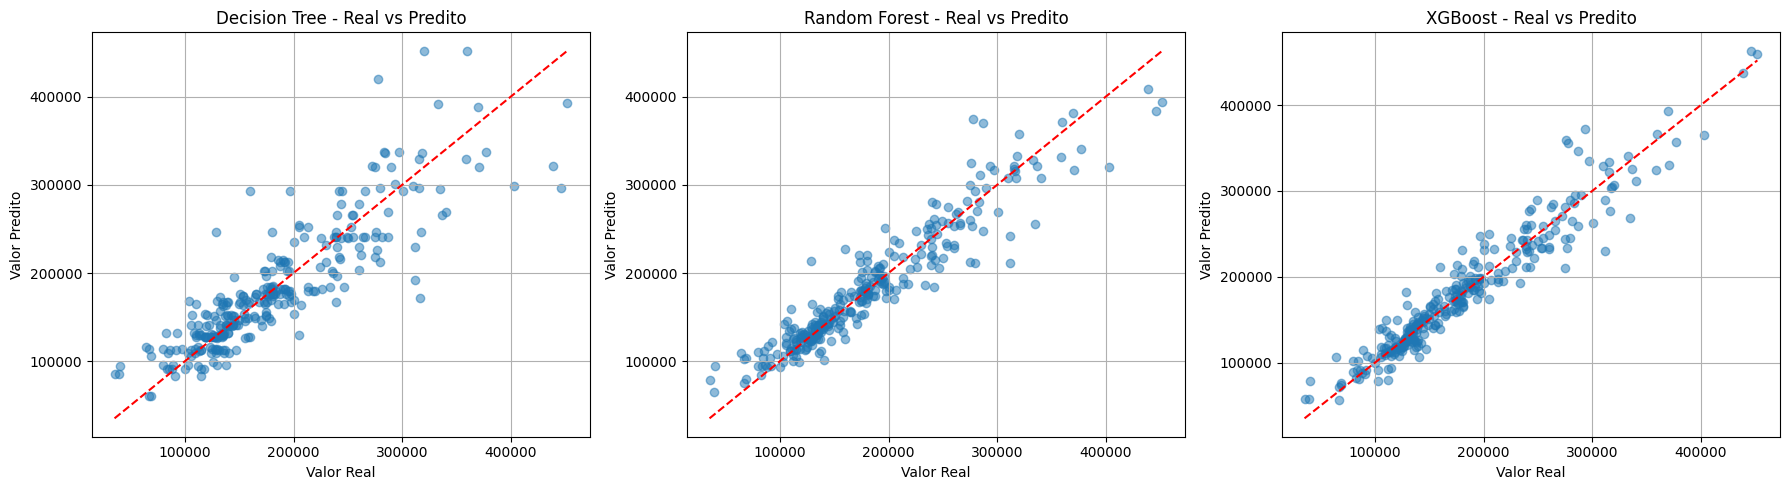

In [136]:
modelos = [
    ('Decision Tree', DecisionTreeRegressor_pipeline),
    ('Random Forest', RandomForest_pipeline),
    ('XGBoost', XGB_pipeline)
]

plt.figure(figsize=(18, 5))

for i, (nome, modelo) in enumerate(modelos):
    y_pred = modelo.predict(X_test)

    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Predito')
    plt.title(f'{nome} - Real vs Predito')
    plt.grid(True)

plt.tight_layout()
plt.show()